# Modeling generalized tonic-clonic epileptic seizures with coupled Fitzhugh oscillators

### Yessica Orozco and Pablo Padilla

In [2]:
import scipy as sc
import matplotlib.pylab as plt
import sympy as sy
import math
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

## Equations

$$ \dot{v} = c[v_i − w_i − \dfrac{1}{3}v^3_i ] + \dfrac{K}{N}\sum_{j=1}^{N} sen(v_j - v_i) $$

$$ \dot{w} =  d[a + bv_i - w_i] $$


## Nullclines Shyam


$$ w_v = v^3/3 - v  - I \qquad  \equiv \qquad  w_v =  v - v^3/3 + I/c  $$

$$ w_w = \dfrac{a-v}{b} \qquad  \ncong \qquad  w_w = a + bv  $$


## Parameters
  
  $$ a = 2, b = 1, c = 3, d = 0.1 , I = 2.0, K = 5,  step = 0.01, ti = 0, tf = 300 $$

parameter for limit cycle

 pars = {'a':0.1, 'b':3.4, 'c':3, 'd':0.1, 'I':0.0, 'step':0.01, 'ti':0, 'tf':500} 

 a = 0.1, b = 0.4, c = 3, d = 0.05, I = 0.0, step = 0.01, ti = 0, tf = 500 

## Original FitzhHugh Model (without coupled oscillators)

In [4]:
import numpy as np
import matplotlib.pyplot as gr

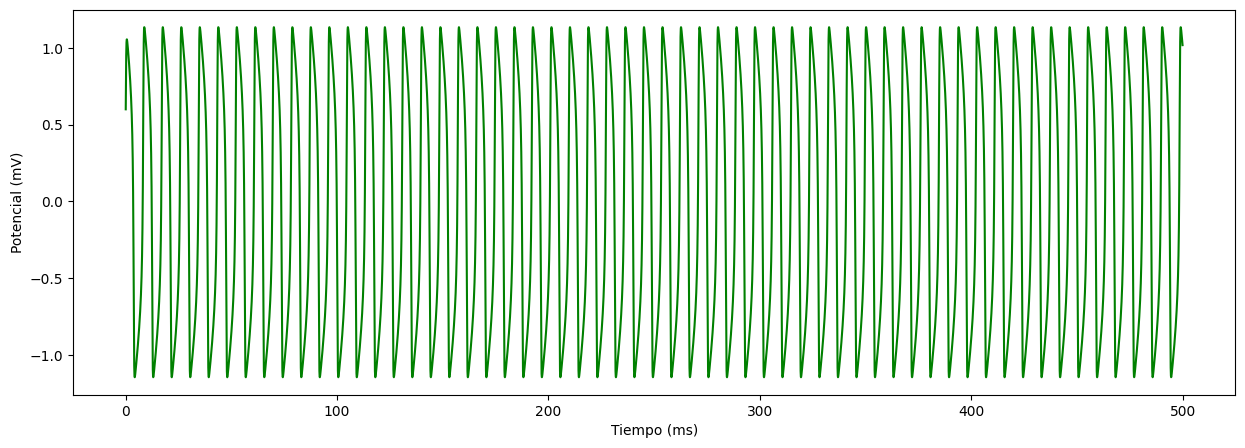

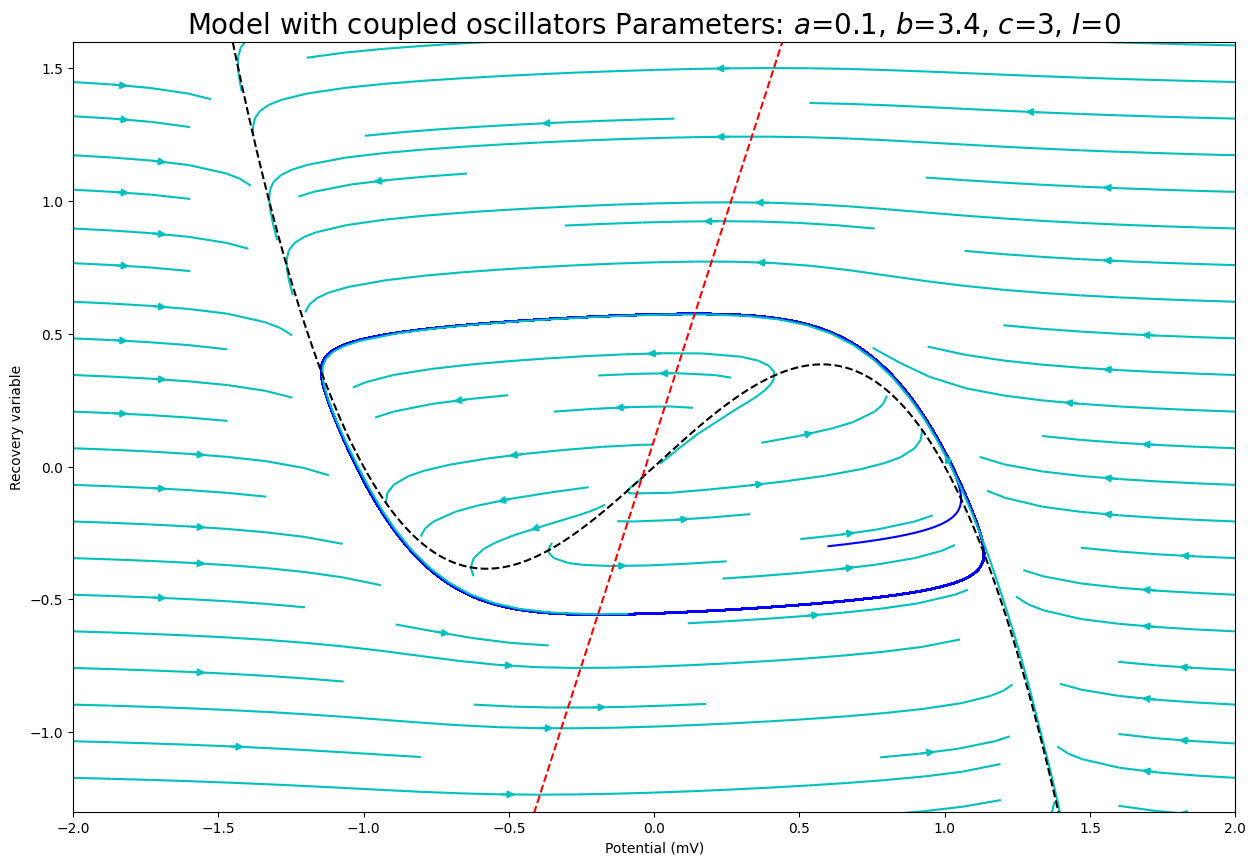

In [8]:
# Constants for equations 

pars = {'a':0.1, 'b':3.4, 'c':3, 'd':0.1, 'I':0.0, 'step':0.01, 'ti':0, 'tf':500} # Ciclo Limite
#pars = {'a':2, 'b':1, 'c':3, 'd':0.1, 'I':2.0, 'step':0.01, 'ti':0, 'tf':500} # parámetros del art shyam NO GENERAN EL CICLO LIM
#pars = {'a':0.7, 'b':0.8, 'c':3, 'd':0.1, 'I':-0.4, 'step':0.01, 'ti':0, 'tf':500} # parámetros del art FH fig 5 SI GENERAN EL CICLO LIM

# Grid
Vi = np.linspace(-2,2,500) 
Wi = np.linspace(-2,2,500) 
X,Y = np.meshgrid(Vi,Wi)  #

# The differential equations represent the direction for each point, so that in the phase plane we have


dVdt = pars['c']*(X - Y - (X**3)) + pars['I']  
dWdt = pars['d'] *(pars['a'] + pars['b']*X - Y)

#  Nullclines

W_v = -(Vi**3) + Vi + pars['I']/pars['c']  
W_w = pars['a'] + Vi*pars['b']

# We use an RK4 to solve the differential equations

def RK4(CI,F,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        k1 = F(U[i])*step
        k2 = F(U[i]+k1/2)*step
        k3 = F(U[i]+k2/2)*step
        k4 = F(U[i]+k3)*step
        U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

# We define the differential equations and the necessary functions

def eqs(U):  #X=V y Y=W

    V,W = U
    dV = pars['c']*(V - W - (V**3)) + pars['I'] 
    dW = pars['d']*(pars['a'] + pars['b']*V - W) 

    return np.array([dV,dW])

# We solve for our initial conditions

x0 =[0.6,-0.3] #CI
t = np.arange(pars['ti'],pars['tf'],pars['step'])

sol = RK4(x0,eqs,pars['ti'],pars['tf'],pars['step'])

# The first graph will give us the potential as a function of time
fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='green')
G.set_xlabel('Tiempo (ms)')
G.set_ylabel('Potencial (mV)')

# The second graph will give us the phase plane

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='blue') # cycles in blue
H.streamplot(X,Y,dVdt,dWdt,color='c') # vectors in light blue
H.plot(Vi,W_v,color='black',ls='--',label='Ceroclina de n')
H.plot(Vi,W_w,color='red',ls='--',label='Ceroclina de V')
H.set_xlabel('Potential (mV)')
H.set_ylabel('Recovery variable')
H.set_title(  "Model with coupled oscillators Parameters: $a$=%g, $b$=%g, $c$=%g, $I$=%g"
                     %(pars["a"], pars["b"], pars["c"], pars["I"]), size="20"       )
H.set_xlim(-2,2)
H.set_ylim(-1.3,1.6)
gr.show()

# Thesis work uncoupled oscillators

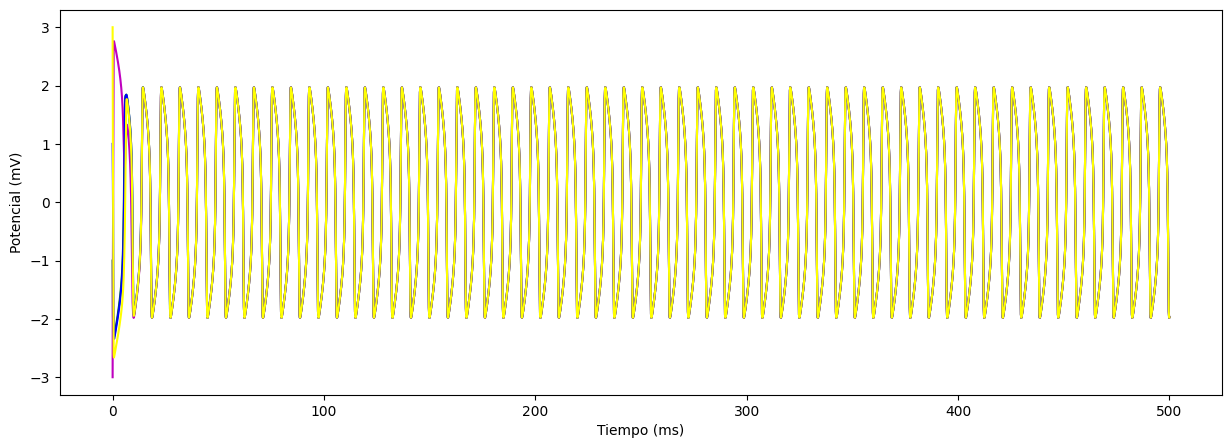

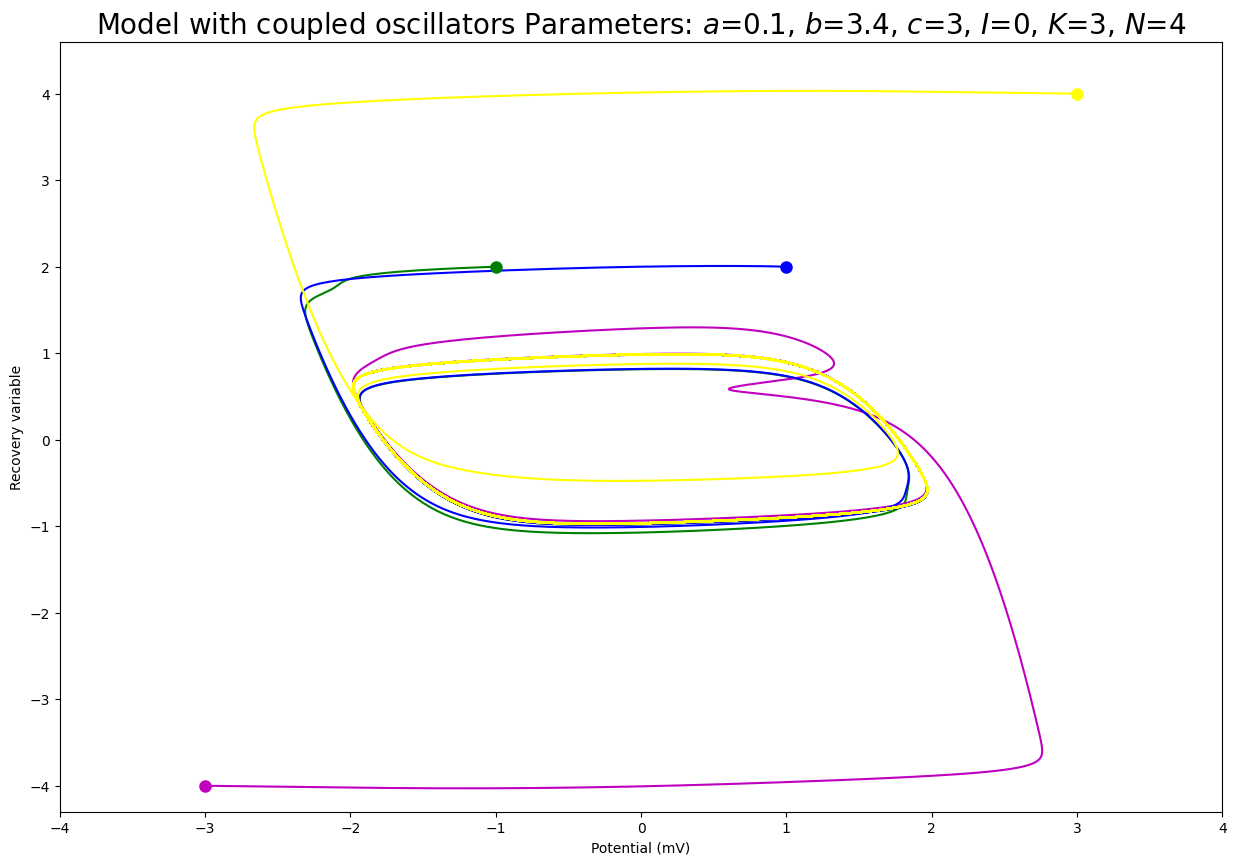

Initiales conditions:
[-1, 2, -3, -4, 1, 2, 3, 4]


In [14]:
pars = {'a':0.1, 'b':3.4, 'c':3, 'd':0.1, 'I':0.0, 'K':3, 'N':8, 'step':0.01, 'ti':0, 'tf':500} 


CI = [-1,2,-3,-4,1,2,3,4] 
#CI = [21,22,23,24,-15,-16,-17,-18]


def RK4(CI,F,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        k1 = F(U[i])*step
        k2 = F(U[i]+k1/2)*step
        k3 = F(U[i]+k2/2)*step
        k4 = F(U[i]+k3)*step
        U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()


def eqs(U):  #X=V y Y=W

    V1,W1,V2,W2,V3,W3,V4,W4 = U
    
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) + (pars['K']/(pars['N']/2))*(np.sin(V2-V1) + np.sin(V3-V1) + np.sin(V4-V1)) #pars['I']) 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) + (pars['K']/(pars['N']/2))*(np.sin(V1-V2) + np.sin(V3-V2) + np.sin(V4-V2)) #pars['I'])
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
    dV3 = pars['c']*(V3 - W3 - (V3**3)/3) + (pars['K']/(pars['N']/2))*(np.sin(V1-V3) + np.sin(V2-V3) + np.sin(V4-V3)) #pars['I'])
    dW3 = pars['d']*(pars['a'] + pars['b']*V3 - W3) 
    dV4 = pars['c']*(V4 - W4 - (V4**3)/3) + (pars['K']/(pars['N']/2))*(np.sin(V1-V4) + np.sin(V2-V4) + np.sin(V3-V4)) #pars['I'])
    dW4 = pars['d']*(pars['a'] + pars['b']*V4 - W4)
    
    return np.array([dV1,dW1,dV2,dW2,dV3,dW3,dV4,dW4])

t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,pars['ti'],pars['tf'],pars['step'])


fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='green')
G.plot(t,sol[2],color='m')
G.plot(t,sol[4],color='blue')
G.plot(t,sol[6],color='yellow')
G.set_xlabel('Tiempo (ms)')
G.set_ylabel('Potencial (mV)')

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='green') 
H.plot(sol[2],sol[3],color='m') 
H.plot(sol[4],sol[5],color='blue') 
H.plot(sol[6],sol[7],color='yellow') 
H.plot(CI[0], CI[1],'green', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'m', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H.plot(CI[4], CI[5],'blue', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[4],CI[5]))
H.plot(CI[6], CI[7],'yellow', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[6],CI[7]))
H.set_xlabel('Potential (mV)')
H.set_ylabel('Recovery variable')
H.set_title(  "Model with coupled oscillators Parameters: $a$=%g, $b$=%g, $c$=%g, $I$=%g, $K$=%g, $N$=%g"
                     %(pars["a"], pars["b"], pars["c"], pars["I"],pars["K"], pars["N"]/2), size="20"       )
H.set_xlim(-4,4)
H.set_ylim(-4.3,4.6)
gr.show()
print('Initiales conditions:')
print(CI)

# Simulation with two oscillatons

## one change in the coupled constant

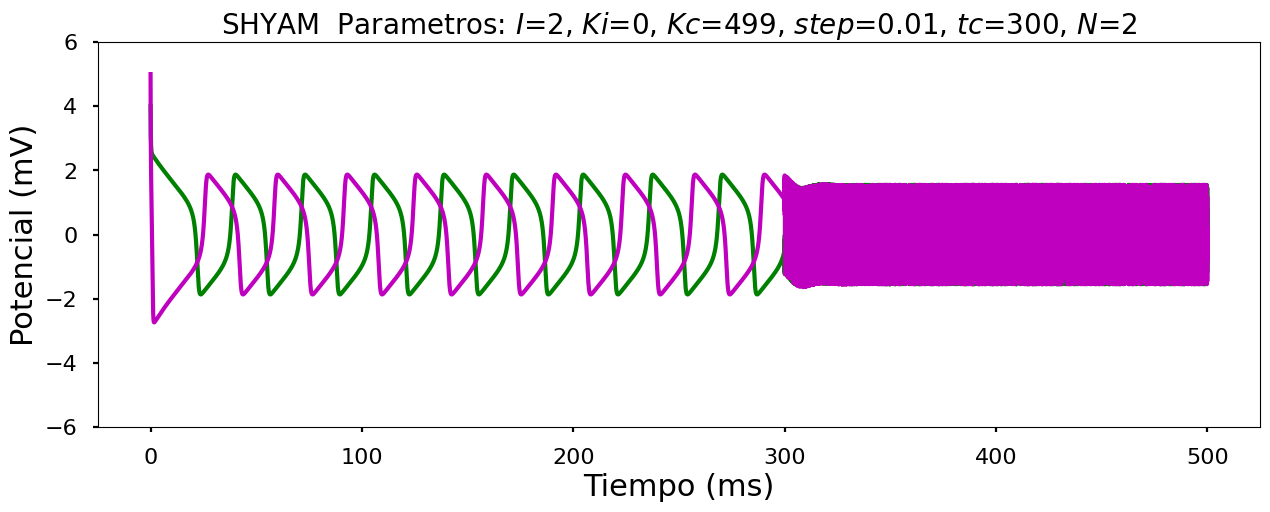

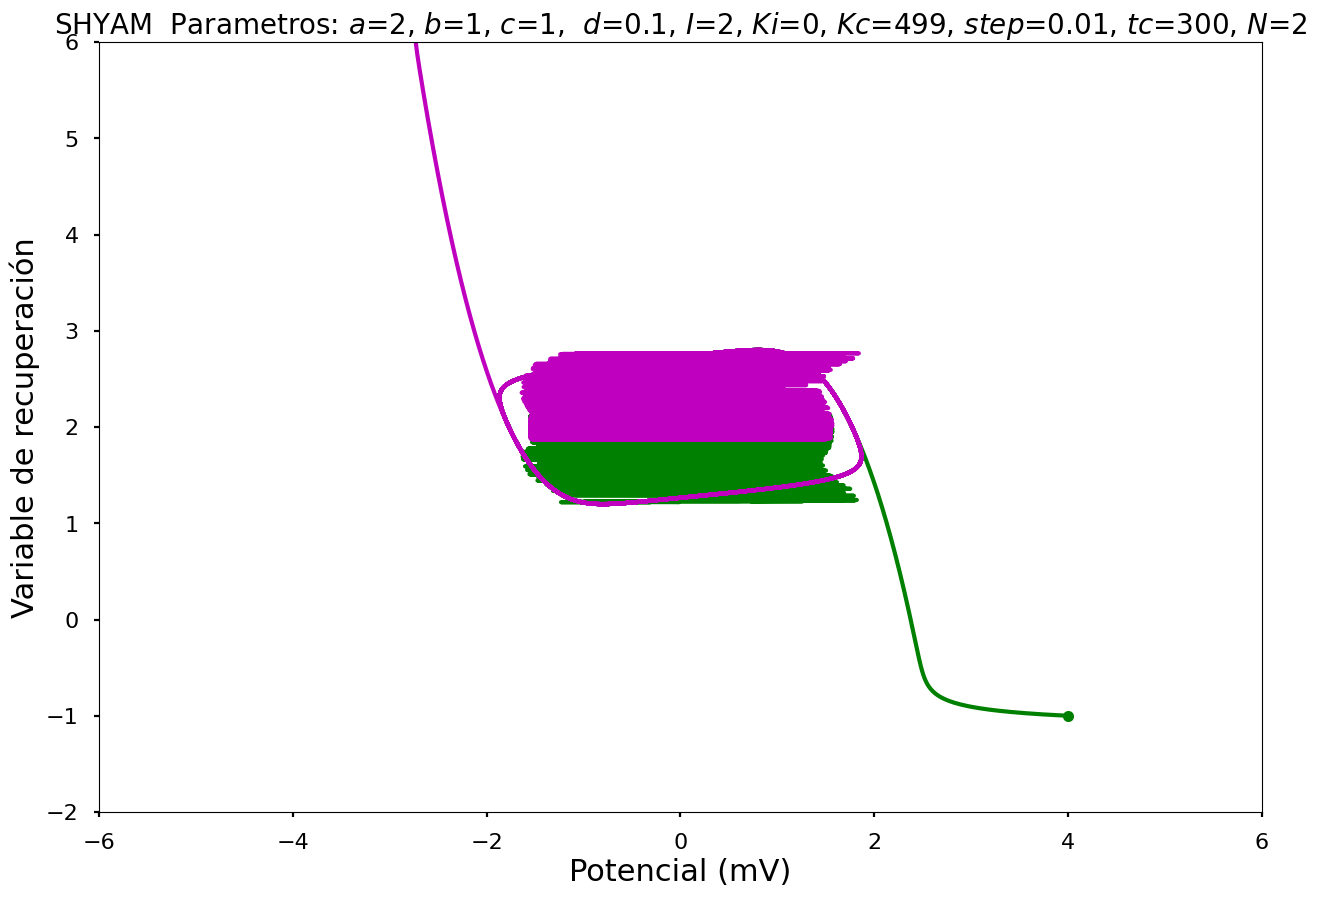

In [39]:
# We define the constants for the equations

pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kc':499, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
CI = [4,-1,5,7] #  [0,-1,-2,5]#   [21,22,-17,-18] #  
#[21,22,23,24,-15,-16,-17,-18] # [4,-1,5,7,-2,-6,-3,-2] #

#CChange of K in a given time..
tcambio =  (pars['tc']/pars['step'])

# We use an RK4 to solve the differential equations

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

# We define the differential equations and the necessary functions

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
  
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Changes Ki por Kc
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kc']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kc']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)  
   
    
    return np.array([dV1,dW1,dV2,dW2])


# We solve for our initial conditions
t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])

##  TABLE I WITHOUT DEATH OF THE OSCILLATOR
#CI = [-10,-4,-2,5,-7,-5,-10,-4] # K = 416.1 a 416.2 es la bifurcacion
#CI = [-1,2,-3,-4,1,2,3,4]  # K = 417.2 a 417.3 es la bifurcacion
#CI = [4,-1,5,7,-2,-6,-3,-2]  # K = 416.7 a 416.8 es la bifurcacion # condiciones de la figura 3 y 6 art Shyam
#CI = [4,5,6,7,8,9,10,11]  # K = 416.5 a 416.6 es la bifurcacion

##  TABLE II WITH DEATH OF THE OSCILLATOR
#CI = [24,25,26,27,-28,-29,-20,-21]   #K = 7.1
#CI = [21,22,23,24,-15,-16,-17,-18]  #K = 7.1 reproduce la Fig 9. del artículo
#CI = [27,28,29,30,-15,-16,-17,-18]
#CI = [34,35,36,30,-54,-26,-37,-18]


 # This graph will give us the potential as a function of time

fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='green',linewidth=3)
G.plot(t,sol[2],color='m',linewidth=3)
G.set_xlabel('Tiempo (ms)',size = 22)
G.set_ylabel('Potencial (mV)',size = 22)
G.set_title(  "SHYAM  Parametros: $I$=%g, $Ki$=%g, $Kc$=%g, $step$=%g, $tc$=%g, $N$=%g"
                     %(pars["I"], pars["Ki"], pars["Kc"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

G.set_ylim(-6,6)
#gr.savefig('2_ocs_plano_ac_k900.png')

# This graph will give us the phase plane

fig,H = gr.subplots(1,1,figsize=(15,10))

H.plot(sol[0],sol[1],color='green',linewidth=3) # traza los ciclos limite
H.plot(sol[2],sol[3],color='m',linewidth=3) 
H.plot(CI[0], CI[1],'green', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
H.plot(CI[2], CI[3],'m', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
H.set_xlabel('Potencial (mV)',size = 22)
H.set_ylabel('Variable de recuperación',size = 22)
H.set_title(  "SHYAM  Parametros: $a$=%g, $b$=%g, $c$=%g,  $d$=%g, $I$=%g, $Ki$=%g, $Kc$=%g, $step$=%g, $tc$=%g, $N$=%g"
                     %(pars["a"], pars["b"], pars["c"], pars["d"], pars["I"], pars["Ki"], pars["Kc"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

H.set_xlim(-6,6)
H.set_ylim(-2,6)
#H.legend()
#gr.savefig('2_ocs_volt_ac_k900.png')
gr.show()


#print('Condiciones Iniciales utilizandas:')
#print(CI)           

largo del voltaje ictal 250


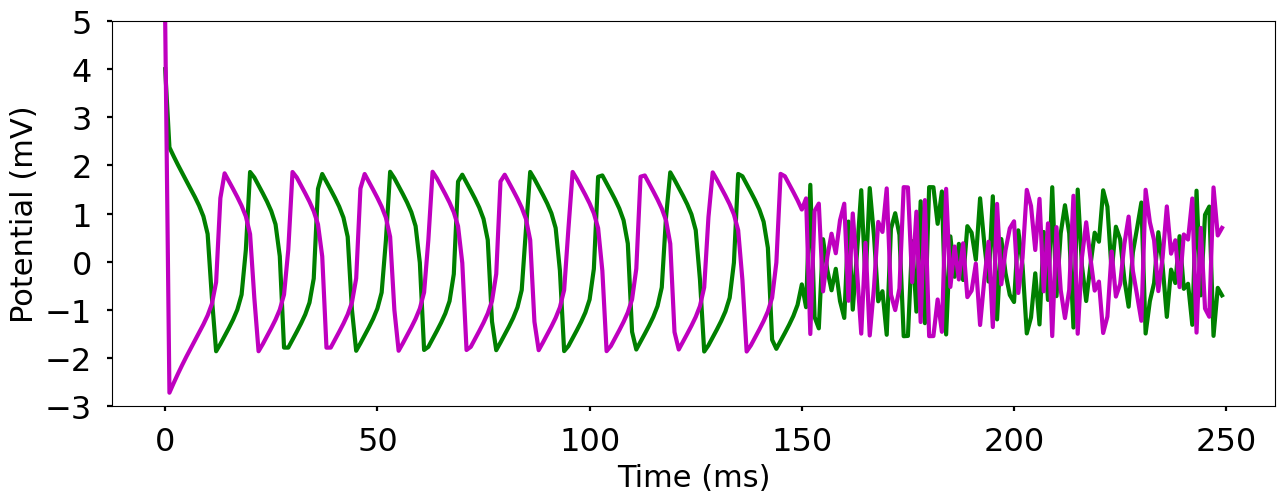

In [40]:
 # VOLTAJE ICTAL
    
v1 = sol[0]
v2 = sol[2] 
v1b = []
v2b = []
    
for i in range (0,50000-1,200):
    x =  v1[i] 
    v1b.append(x)
    y =  v2[i]
    v2b.append(y)
print('largo del voltaje ictal',len(v1b),) 

t2 = np.arange(0,250)

fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,v1b,color='green',linewidth=3)
M.plot(t2,v2b,color='m',linewidth=3)
M.set_xlabel('Time (ms)', size = 22)
M.set_ylabel('Potential (mV)', size = 22)
#M.set_xlim(-6,6)
M.set_ylim(-3,5)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
#gr.savefig('2ocs_k499_250muestras.png')
gr.show()

# dx, dy  and Z plots

In [41]:
z1 =[v1[0]]
z2 =[v2[0]]

pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kc':490, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':300,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM

t = np.arange(pars['ti'],pars['tf'],pars['step'])
tcambio =  (pars['tc']/pars['step']) # 30000.0

z1 =[v1[0]]
z2 =[v2[0]]

for i in range(len(t)-1):
    if i <= tcambio:
        z_1 = (pars['Ki']/(pars['N']/2))*(np.sin(v2[i]-v1[i]))
        z1.append(z_1)
        z_2 = (pars['Ki']/(pars['N']/2))*(np.sin(v1[i]-v2[i]))
        z2.append(z_2)
      
    else:
        z_1 = (pars['Kc']/(pars['N']/2))*(np.sin(v2[i]-v1[i]))
        z1.append(z_1)
        z_2 = (pars['Kc']/(pars['N']/2))*(np.sin(v1[i]-v2[i]))
        z2.append(z_2)
 


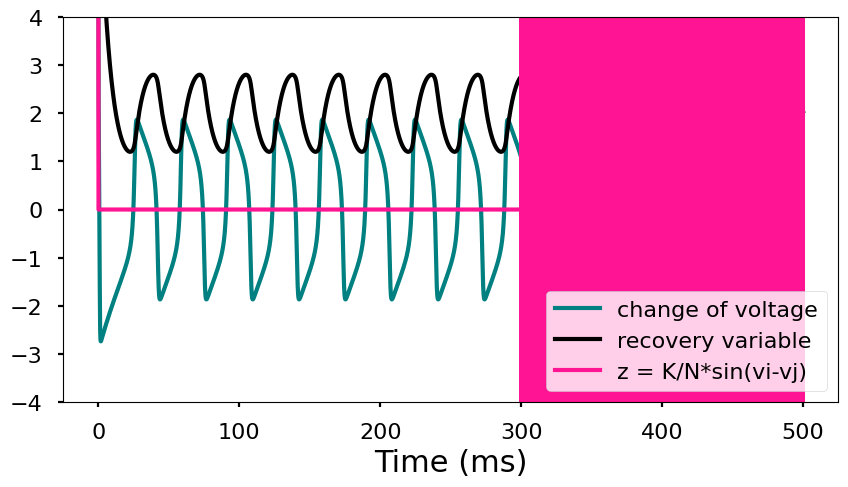

In [42]:
gr.subplots(figsize=(10, 5))

gr.plot(t,sol[2],color='teal',linewidth=3,label="change of voltage")
gr.plot(t,sol[3],color='black', label="recovery variable",linewidth=3)
gr.plot(t,z2,color='deeppink', label="z = K/N*sin(vi-vj)",linewidth=3)
gr.xlabel('Time (ms)', size = 22)
gr.ylim(-4,4)
#gr.title(  "Osiclador 1 de 2: $I$=%g, $Ki$=%g, $Kc$=%g, $step$=%g, $tc$=%g, $N$=%g"
 #                    %(pars["I"], pars["Ki"], pars["Kc"], pars["step"], pars["tc"], pars["N"]/2), size="20")

gr.legend()
gr.show()
#gr.savefig('2osc_dx_dy_z_k7.png')

 # Simulation with two oscillatons

## two changes in the coupled constant

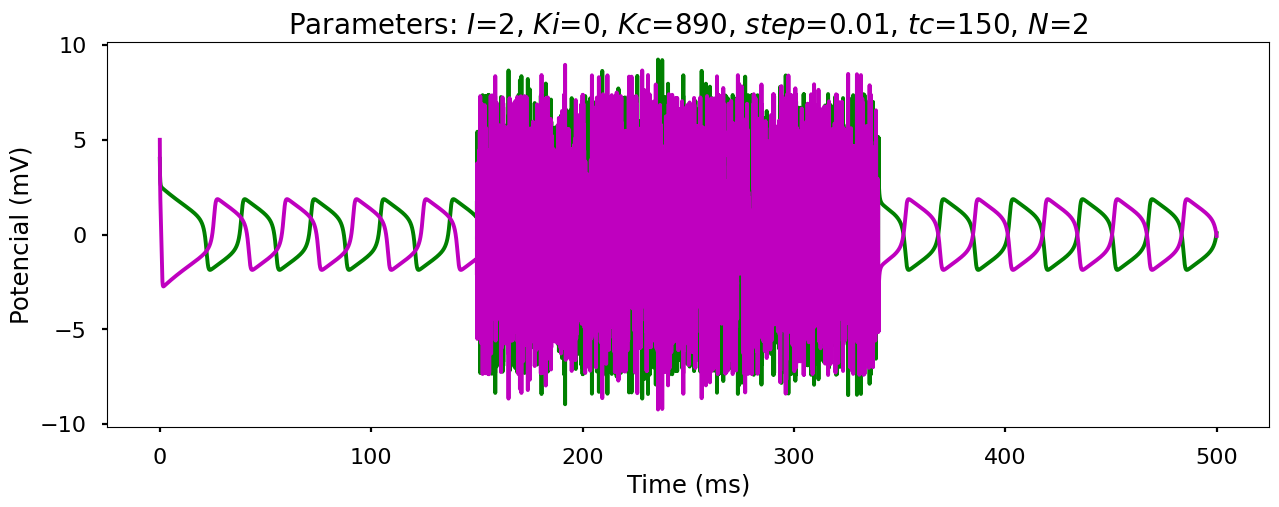

Initial conditions used:
[4, -1, 5, 7]


In [43]:
# We define the constants for the equations
pars = {'a':2, 'b':1, 'c':1, 'd':0.1,'Ki':0, 'Kc':890, 'N':4, 'I':2.0, 'step':0.01, 'ti':0,'tc':150,'tc2':340,'tf':500} # parámetros del art shyam SI GENERAN EL CICLO LIM
#pars = {'a':0.7, 'b':0.8, 'c':3, 'd':0.1, 'I':-0.4, 'step':0.01, 'ti':0, 'tf':500} # parámetros del art FH fig 5 SI GENERAN EL CICLO LIM
#pars = {'a':0.1, 'b':0.4, 'c':3, 'd':20, 'I':0.0, 'step':0.01, 'ti':0, 'tf':500} # Ciclo Limite

CI =  [4,-1,5,7] #[21,22,23,24,-15,-16,-17,-18] # 

###### THE FORK WITH THOSE INITIAL CONDITIONS OCCURS AT 417.1
###### 417.1 oscillations appear in pairs
###### between 455 and 460 the even oscillations die
###### between 460 and 487 the oscillations become increasingly finer
###### lEPILEPSY / BIFURCATION SHORT WAVES occurs in 487.1
###### abnomal behaviors between 499 and 746
###### EPILEPSY / BIFURCATION LONG WAVES IN 746.1
###### K's were tested until 2000, the amplitude continued to grow but there were no longer bifurcations



# Change of K in a given time.

tcambio =  (pars['tc']/pars['step'])
tcambio2 =  (pars['tc2']/pars['step'])

# RK4 to solve differential equations

def RK4(CI,F,G,ti,tf,step): 
    t = np.arange(ti,tf,step)
    U = np.zeros((len(t),len(CI)))
    U[0] = CI
    for i in range(len(t)-1):
        if i <= tcambio:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        elif i <= tcambio2:
            k1 = G(U[i])*step
            k2 = G(U[i]+k1/2)*step
            k3 = G(U[i]+k2/2)*step
            k4 = G(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        else:
            k1 = F(U[i])*step
            k2 = F(U[i]+k1/2)*step
            k3 = F(U[i]+k2/2)*step
            k4 = F(U[i]+k3)*step
            U[i+1] = U[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return U.transpose()

# We define the differential equations and the necessary functions

def eqs(U):  #X=V y Y=W
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I']
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Ki']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)
    
    return np.array([dV1,dW1,dV2,dW2])

def eqs2(U):  #X=V y Y=W #Cambia Ki por Kc
    V1,W1,V2,W2 = U
    dV1 = pars['c']*(V1 - W1 - (V1**3)/3) +  (pars['Kc']/(pars['N']/2))*(np.sin(V2-V1)) + pars['I'] 
    dW1 = pars['d']*(pars['a'] + pars['b']*V1 - W1)
    dV2 = pars['c']*(V2 - W2 - (V2**3)/3) +  (pars['Kc']/(pars['N']/2))*(np.sin(V1-V2)) + pars['I']
    dW2 = pars['d']*(pars['a'] + pars['b']*V2 - W2)     
    
    return np.array([dV1,dW1,dV2,dW2])


# Solving for our initial conditions

t = np.arange(pars['ti'],pars['tf'],pars['step'])
sol = RK4(CI,eqs,eqs2,pars['ti'],pars['tf'],pars['step'])


# The first graph will give us the potential as a function of time

fig,G = gr.subplots(1,1,figsize=(15,5))

G.plot(t,sol[0],color='green')
G.plot(t,sol[2],color='m')
G.set_xlabel('Time (ms)')
G.set_ylabel('Potencial (mV)')
G.set_title(  "Parameters: $I$=%g, $Ki$=%g, $Kc$=%g, $step$=%g, $tc$=%g, $N$=%g"
                     %(pars["I"], pars["Ki"], pars["Kc"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

#G.set_ylim(-6,6)
#gr.savefig('DOS_OSCILADORES_fig_30.png')

# This graph will give us the phase plane

#fig,H = gr.subplots(1,1,figsize=(15,10))

#H.plot(sol[0],sol[1],color='green') # trace limit cycle
#H.plot(sol[2],sol[3],color='m') 
#H.plot(CI[0], CI[1],'green', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[0],CI[1]))
#H.plot(CI[2], CI[3],'m', marker = "o", markersize = 8.0, label = 'CI: (%g,%g)' % (CI[2],CI[3]))
#H.set_xlabel('Potencial (mV)')
#H.set_ylabel('Recovery variable')
#H.set_title(  "Parameters: $a$=%g, $b$=%g, $c$=%g,  $d$=%g, $I$=%g, $Ki$=%g, $Kc$=%g, $step$=%g, $tc$=%g, $N$=%g"
#                     %(pars["a"], pars["b"], pars["c"], pars["d"], pars["I"], pars["Ki"], pars["Kc"], pars["step"], pars["tc"], pars["N"]/2), size="20"       )

H.set_xlim(-11,10)
H.set_ylim(-11,10)
#gr.savefig('53b_shyam_ciclos.png')
gr.show()

print('Initial conditions used:')
print(CI)

x= []

In [44]:
v1 = sol[0]
w1 = sol[1]
v2 = sol[2]
w2 = sol[3]

largo del voltaje ictal 250


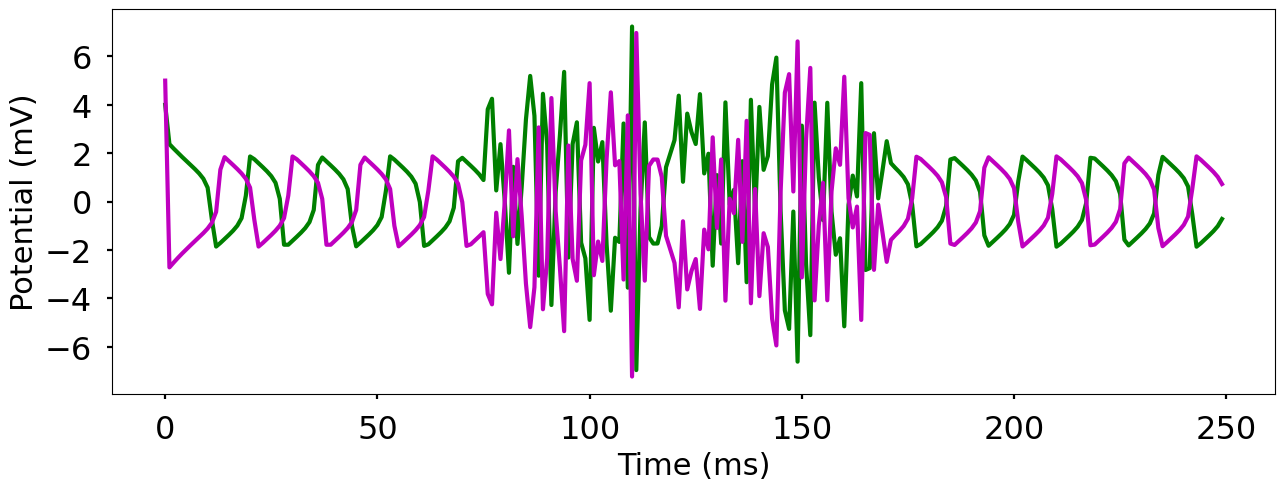

In [46]:
 # VOLTAJE ICTAL
v1 = sol[0]
v2 = sol[2] 
v1b = []
v2b = []
    
for i in range (0,50000-1,200):
    x =  v1[i] 
    v1b.append(x)
    y =  v2[i]
    v2b.append(y)
print('largo del voltaje ictal',len(v1b),) 

t2 = np.arange(0,250)

fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,v1b,color='green',linewidth=3)
M.plot(t2,v2b,color='m',linewidth=3)
M.set_xlabel('Time (ms)', size = 22)
M.set_ylabel('Potential (mV)', size = 22)
gr.xticks(fontsize = 23)
gr.yticks(fontsize = 23)
#gr.savefig('2ocs_k499_250muestras.png')
gr.show()

# Example of one line plotted

largo del voltaje ictal 500


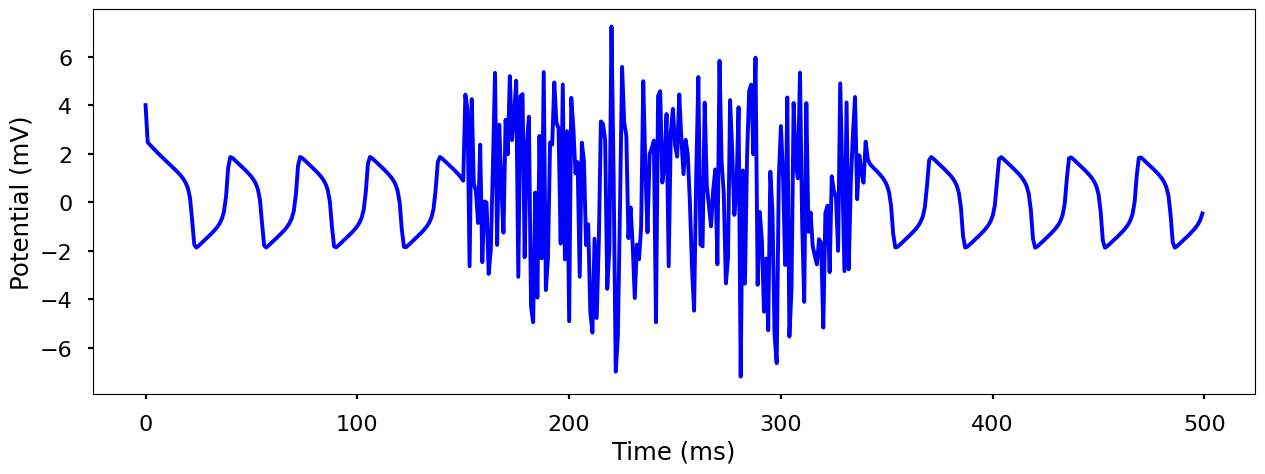

In [47]:
 # VOLTAJE ICTAL
solution = sol[0]
sol_voltaje2 = []
for i in range (0,50000-1,100):
    x = solution[i] 
    sol_voltaje2.append(x)
print('largo del voltaje ictal',len(sol_voltaje2),) 

t2 = np.arange(0,500)

fig,M = gr.subplots(1,1,figsize=(15,5))
M.plot(t2,sol_voltaje2,color='blue')
M.set_xlabel('Time (ms)')
M.set_ylabel('Potential (mV)')
#gr.savefig('voltaje_ictal0b.png')
gr.show()

# 3D Graps

In [31]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

/tmp/ipykernel_216194/3156728878.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


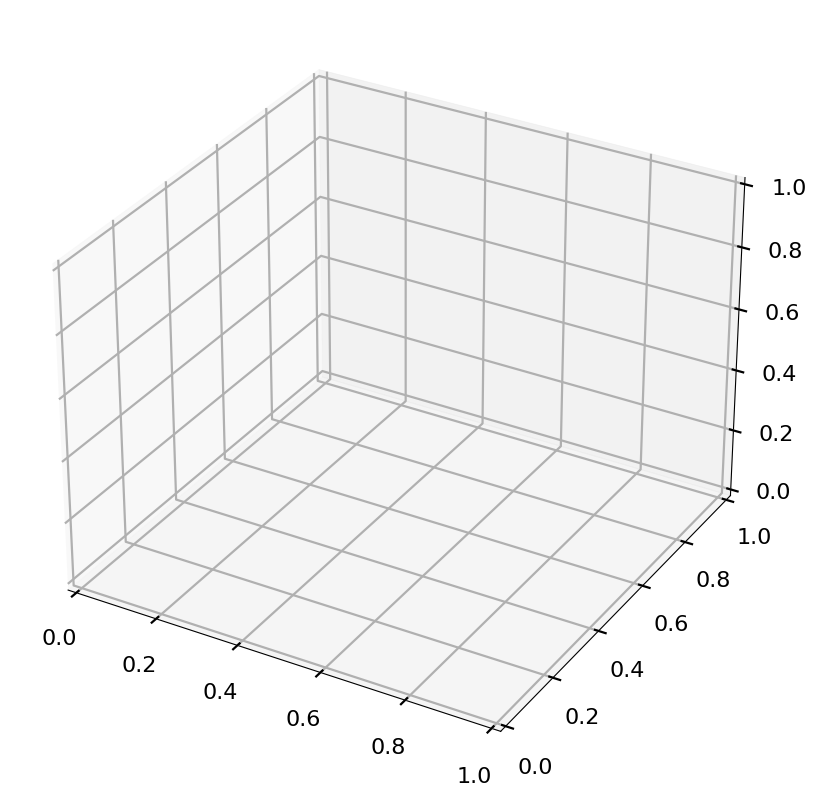

In [32]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')


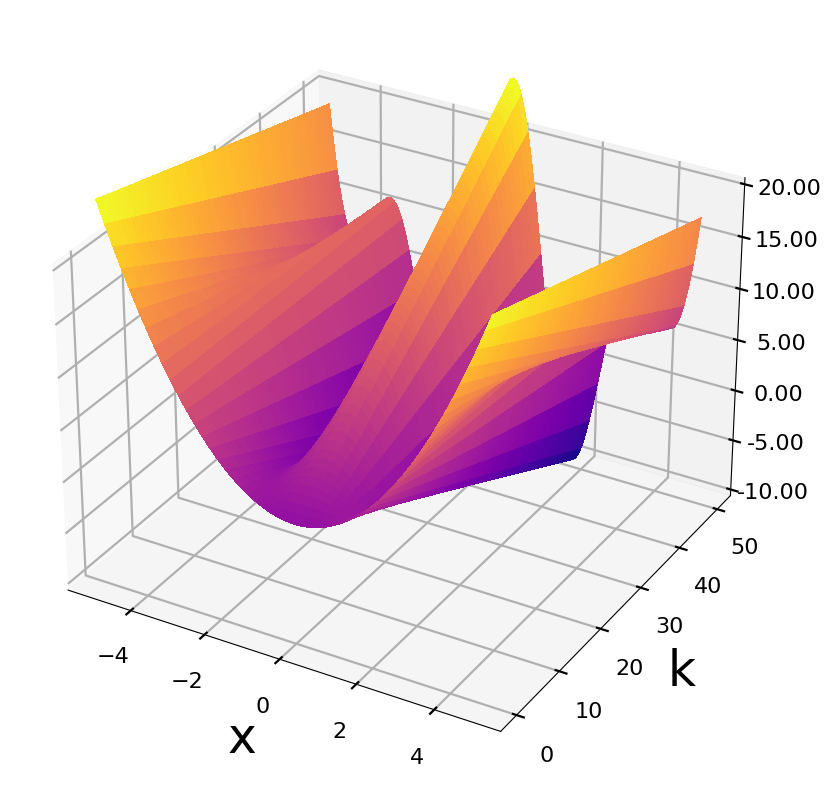

In [48]:


fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')


# Make data.
X = np.arange(-5, 5, 0.05) #LIMITE  X
Y = np.arange(0, 50, 0.05) #LIMITE Y
X, Y = np.meshgrid(X, Y)
Z = X**2+1+(Y/4)*(np.cos(2*X) + np.cos(X))
#Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='plasma',linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-10, 20) #LIMITE Z
#plt.title('$ \lambda $  =  x^2 + $ \dfrac{k}{2}$ [cos(αx) + cos(x)]' )

ax.set_xlabel('x',fontsize = 35,labelpad=20)
ax.set_ylabel('k',fontsize = 35,labelpad=20)
#ax.set_zlabel('$ \lambda $' , fontsize = 40, labelpad=20, rotation = 90)
#ax.set_xlim(-10,10)
#ax.set_ylim(-15,15)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

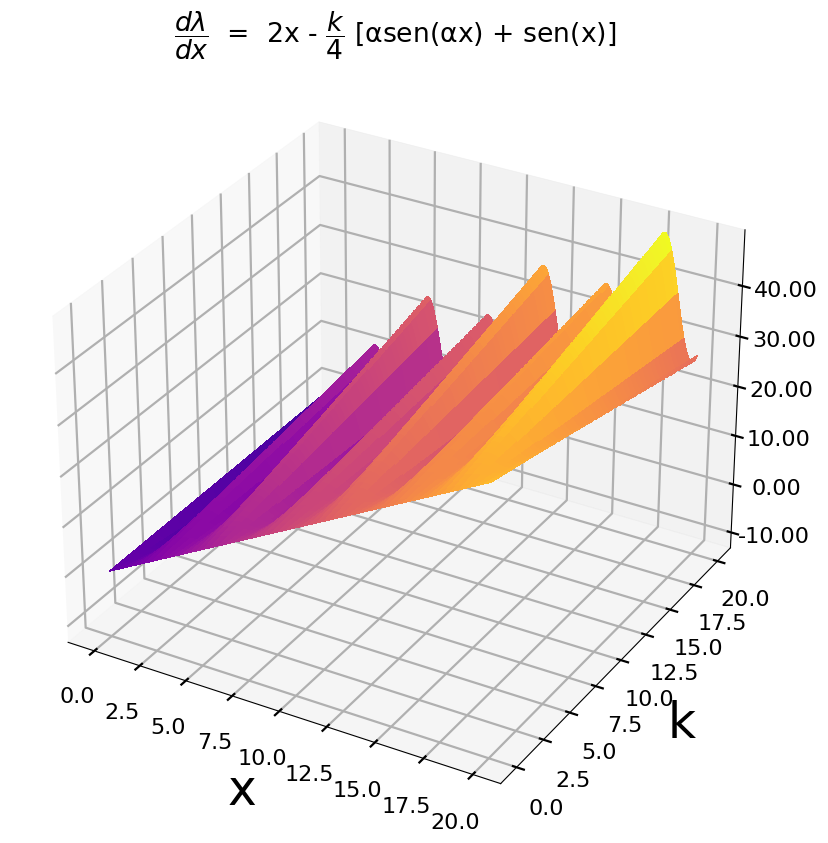

In [49]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')


# Make data.
X = np.arange(0, 20, 0.05) #LIMITE  X
Y = np.arange(0, 20, 0.05) #LIMITE Y
X, Y = np.meshgrid(X, Y)
Z = 2*X - (Y/4)*(2*np.sin(2*X) + np.sin(X)) # np.sqrt(X**2 + Y**2) 
R = (X-Y)*0
#Z = np.sin(R)

P = np.arange(-5, 5, 0.05) #LIMITE  X
Q = np.arange(-5, 5, 0.05) #LIMITE Y
P, Q = np.meshgrid(P, Q)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='plasma',linewidth=0, antialiased=False)  #plasma   #viridis

#ax.set_zlim(-10,40) #LIMITE Z
plt.title('$ \dfrac{ d \lambda}{dx}$  =  2x - $ \dfrac{k}{4}$ [αsen(αx) + sen(x)]' )

ax.set_xlabel('x',fontsize = 35,labelpad=20)
ax.set_ylabel('k',fontsize = 35,labelpad=20)
#ax.set_zlabel('t', fontsize = 35, labelpad=20)
#ax.set_xlim(-10,10)
#ax.set_ylim(-15,15)

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
